В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде __класифікувати__ товари із датасету `fasion_mnist`.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно __91%__. Точність вашої моделі повинна бути `не нижчою` за цей показник. Щоб досягти таких значень вам знадобиться `поекспериментувати з гіперпараметрами мережі`:

- кількість шарів;

- кількість нейронів;

- функції активації;

- кількість епох;

- розмір батчу;

- вибір оптимізатора;

- різні техніки регуляризації і т.д.

Використайте вивчені `техніки виявлення проблем навчання` нейронної мережі, і потім `поекспериментуйте`.

Рішення оформіть у вигляді окремого ноутбука.

In [6]:
from typing import Optional, Union

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.activations import mish, relu, sigmoid, softmax
from tensorflow.keras.datasets import fashion_mnist
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from keras import metrics
from keras import optimizers

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score
# import tensorflow as tf
# from tensorflow.keras.activations import sigmoid
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.metrics import Accuracy
# from tensorflow.keras.utils import to_categorical

###### __Dataset__

In [34]:
# num_classes = 10  # общее количество классов, от 0 до 9
# num_features = 784  # количество атрибутов входного вектора 28 * 28 = 784

learning_rate = 0.001  # скорость обучения нейронной сети
# training_steps = 3000  # максимальное число эпох
batch_size = 256  # пересчитывать веса сети мы будем не на всей выборке, а на ее случайном подможестве из batch_size элементов
# display_step = 100  # каждые 100 итераций мы будем показывать текущее значение функции потерь и точности

n_hidden_1 = 128  # количество нейронов 1-го слоя
n_hidden_2 = 256  # количество нейронов 2-го слоя

BUFFER_SIZE = 5000  # This dataset fills a buffer with buffer_size elements, then randomly samples elements from this buffer, replacing the selected elements with new elements.

In [35]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.dtype, x_train[0].shape

(dtype('uint8'), (28, 28))

In [36]:
NUM_FEATURES = x_train[0].shape[0] * x_train[0].shape[1]

In [37]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# each sample (28x28) to 1x784
x_train, x_test = x_train.reshape([-1, NUM_FEATURES]), x_test.reshape([-1, NUM_FEATURES])
print(min(x_train.min(), x_test.min()))
maximum = max(x_train.max(), x_test.max()) # np.max([x_train.max(), x_test.max()]) 
maximum

0.0


255.0

In [38]:
# Normalize (min = 0)
x_train, x_test = x_train / maximum, x_test / maximum

In [28]:
# Перемешаем тренировочные данные (split to batches & ...)
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(BUFFER_SIZE).batch(batch_size).prefetch(1)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [43]:
max(y_train.max(), y_test.max()), min(y_train.min(), y_test.min())

(9, 0)

In [45]:
type(y_train)

numpy.ndarray

In [48]:
NUM_CLASSES = len(set(np.concatenate((y_train, y_test), axis=0)))
NUM_CLASSES

10

In [50]:
# y_true = tf.one_hot(y_train, depth=NUM_CLASSES)
# y_true.shape

TensorShape([60000, 10])

###### __Model__

- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy

In [139]:
# number of hidden layers
n_layers = [el for el in range(1, 4)]  # 1, 2, 3
n_of_neurons = [[2**el for el in range(1, 9)] for _ in n_layers]
activations = ['mish', 'relu', 'sigmoid', 'softmax']
n_epoch = 10  # max limit
batch_size = [2**el for el in range(7, 10)]
optimizators = [optimizers.legacy.SGD, optimizers.legacy.RMSprop, optimizers.legacy.Adam]
learning_rate = [10**el for el in range(-3, 0)]


In [140]:
model = Sequential()
model.add(Dense(n_hidden_1, activation='sigmoid', input_shape=(NUM_FEATURES,)))
model.add(Dense(n_hidden_2, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(
              optimizer=optimizers.SGD(learning_rate=0.001), # legacy
              loss=losses.CategoricalCrossentropy(),  # 'categorical_crossentropy' losses.binary_crossentropy,
              metrics=['accuracy']  # metrics.Accuracy()
              )

###### __Training__

In [141]:
y_true = tf.one_hot(y_train, depth=NUM_CLASSES).numpy()
y_truev = tf.one_hot(y_test, depth=NUM_CLASSES).numpy()
y_true.shape, y_truev.shape

((60000, 10), (10000, 10))

In [142]:
# x_val = x_train[:10000]
# partial_x_train = x_train[10000:]

# y_val = y_train[:10000]
# partial_y_train = y_train[10000:]

history = model.fit(
                    x_train,
                    y_true,
                    epochs=100,
                    batch_size=256,
                    validation_data=(x_test, y_truev)
                    )

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 2.3362 - accuracy: 0.0717 - val_loss: 2.3041 - val_accuracy: 0.0636
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 2.2985 - accuracy: 0.1115 - val_loss: 2.2956 - val_accuracy: 0.1400
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 2.2933 - accuracy: 0.1815 - val_loss: 2.2918 - val_accuracy: 0.1647
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 2.2896 - accuracy: 0.2097 - val_loss: 2.2881 - val_accuracy: 0.2318
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 2.2859 - accuracy: 0.2529 - val_loss: 2.2844 - val_accuracy: 0.2849
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 2.2822 - accuracy: 0.2973 - val_loss: 2.2807 - val_accuracy: 0.3122
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 2.2785 - accuracy: 0.3226 - val_loss: 2.2770 - val_accuracy: 0.3497

###### __Error Analysis__

In [143]:
print(history.history.keys())
""" 
loss - список, в якому зберігається історія змін помилки на навчальних даних залежно від епохи
val_loss - список, де зберігається історія змін помилки на тестових даних залежно від епохи
accuracy - список, в якому зберігається історія змін точності на навчальних даних залежно від епохи
val_accuracy - список, де зберігається історія змін точності на тестових даних залежно від епохи
"""

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


' \nloss - список, в якому зберігається історія змін помилки на навчальних даних залежно від епохи\nval_loss - список, де зберігається історія змін помилки на тестових даних залежно від епохи\naccuracy - список, в якому зберігається історія змін точності на навчальних даних залежно від епохи\nval_accuracy - список, де зберігається історія змін точності на тестових даних залежно від епохи\n'

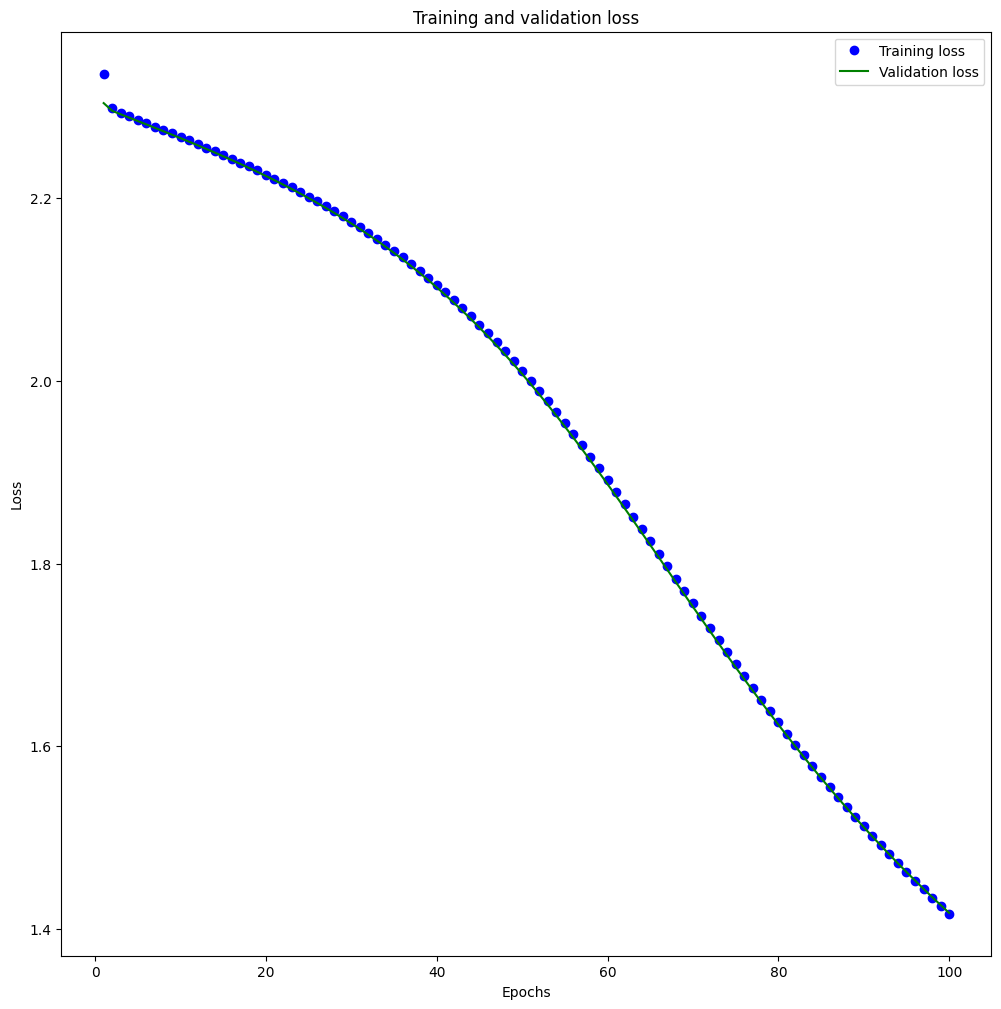

<Figure size 640x480 with 0 Axes>

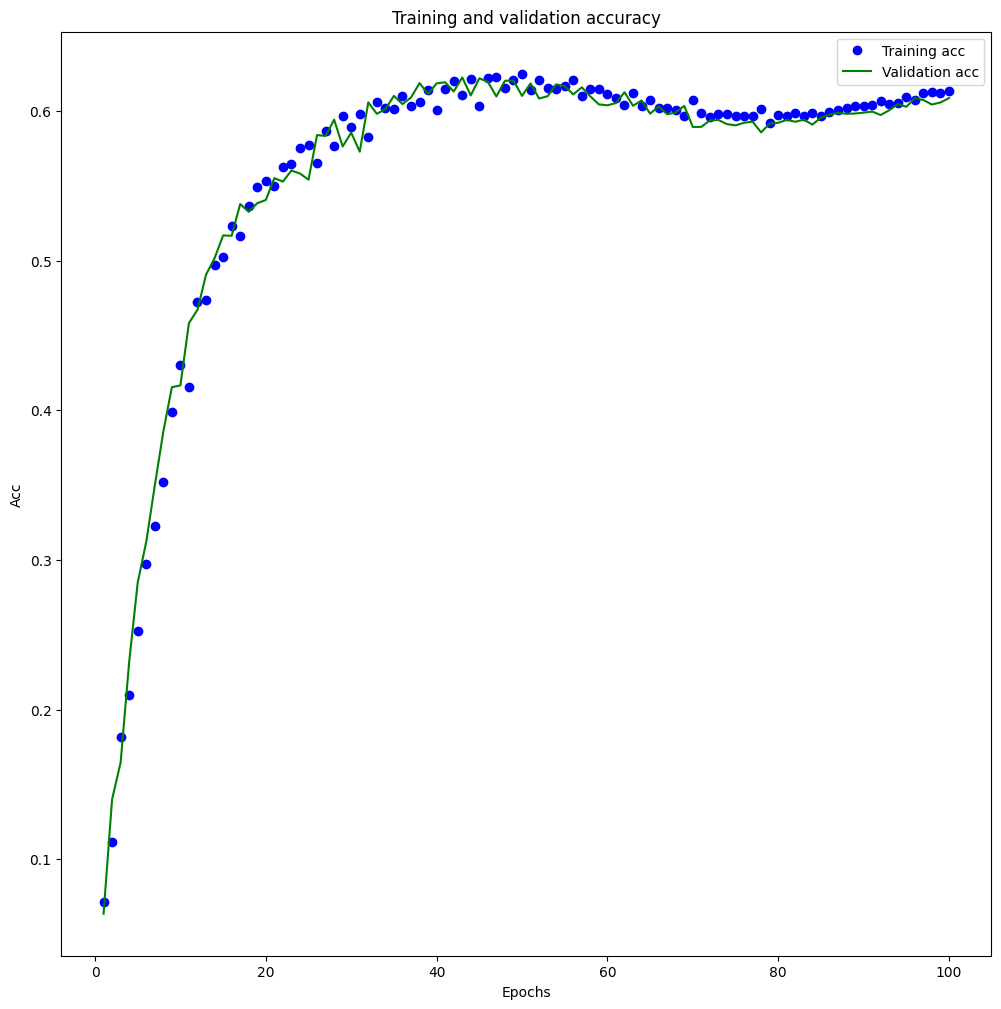

In [147]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(12, 12))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.clf()
plt.figure(figsize=(12, 12))
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()